In [61]:
using Clustering
using MultivariateStats
using StatsBase
using CSV
using DataFrames
using CairoMakie

In [63]:
tree = CSV.read("data/bipartition_4taxa_tree.csv", DataFrame);

In [64]:
# kmeans in Clustering.jl can only work on matix, and one tree per column
data = collect(Matrix(tree[:,:])');
dt = fit(ZScoreTransform, data, dims=2)
data = StatsBase.transform(dt, data)
replace!(data, NaN=>0)

7×50000 Matrix{Float64}:
 -0.338843   0.546841   0.740266   …  -0.33034    -0.407648  -0.457926
 -0.333472  -0.678149  -0.0163795     -0.897146    0.496461  -0.308028
  0.327646  -0.503771   0.261475      -0.757011   -0.182455  -0.238909
  1.17469   -0.866192  -0.910438       0.0278396   0.314032   1.59743
  0.271627  -0.287401  -0.287401      -0.287401   -0.287401  -0.287401
 -0.457125  -0.457125  -0.457125   …  -0.457125    0.476502  -0.310249
 -0.463391   1.35842    0.0195581      0.139962   -0.463391  -0.463391

In [65]:
PCA_model = fit(PCA, data, maxoutdim = 2);
PCA_data = predict(PCA_model,data)

2×50000 Matrix{Float64}:
 -0.0179634  1.53635    0.618013  1.77922   …  0.580177  -0.922073  -0.162505
 -0.283743   0.499713  -0.316456  0.971234     0.670064   0.383719   0.58729

In [68]:
using Random
Random.seed!(0)
result = kmeans(data, 2);
counts(result)

2-element Vector{Int64}:
 41329
  8671

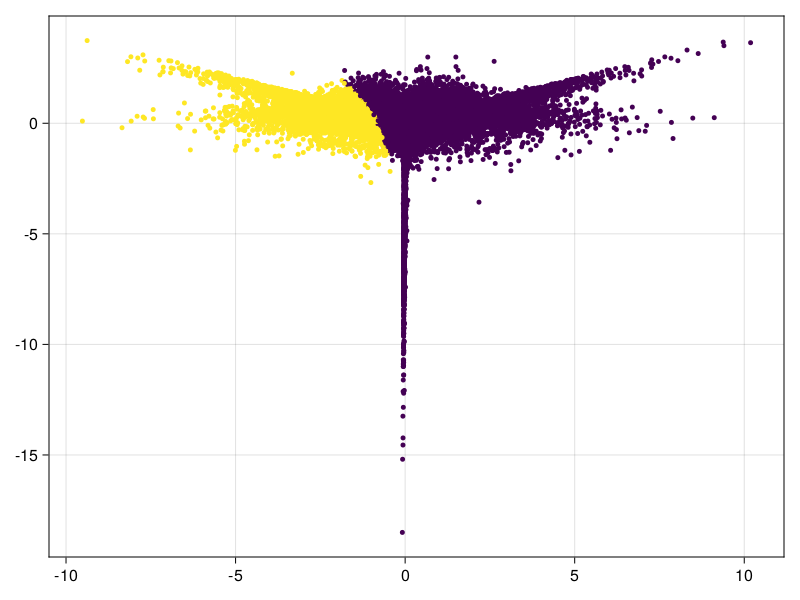

In [69]:
scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = result.assignments)

In [19]:
using ParallelKMeans

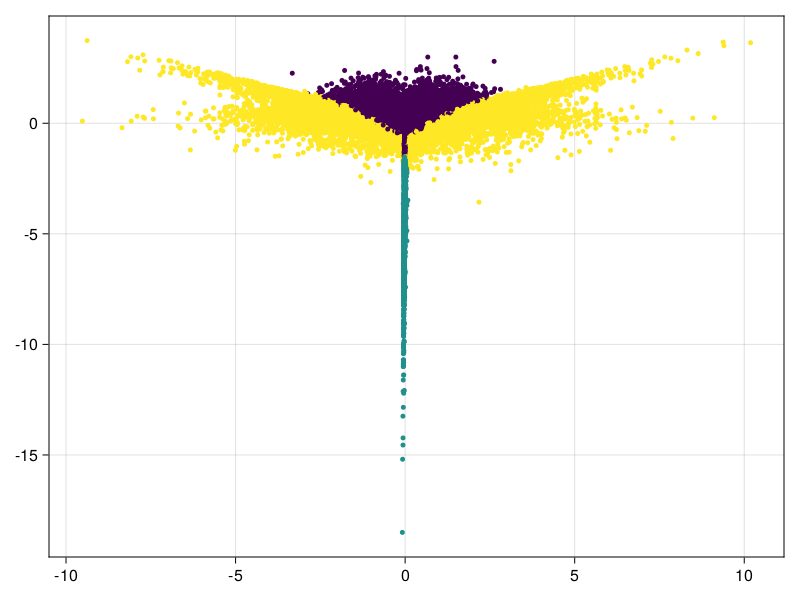

In [35]:
result = ParallelKMeans.kmeans(data,3)
scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = result.assignments)

In [20]:
# n is the number of cluters

function plot_kmeans(tree, n)
    # convert tree from dataframe to matrix, each column is a tree
    data = collect(Matrix(tree[:,:])');
    
    # standardize tree
    dt = fit(ZScoreTransform, data, dims=2)
    data = StatsBase.transform(dt, data)
    
    # replace NaN value with 0
    replace!(data, NaN=>0)
    
    # apply kmeans clustering
    # init works like seed of random, Its length should be the same as the number of clusters
    seed = Vector{Int64}()
    for i in range(1,n)
        push!(seed, i)
    end
    
    result = kmeans(data, n, init = seed);
    PCA_model = fit(PCA, data, maxoutdim = 2);
    PCA_data = predict(PCA_model,data)
    scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = result.assignments)
end;

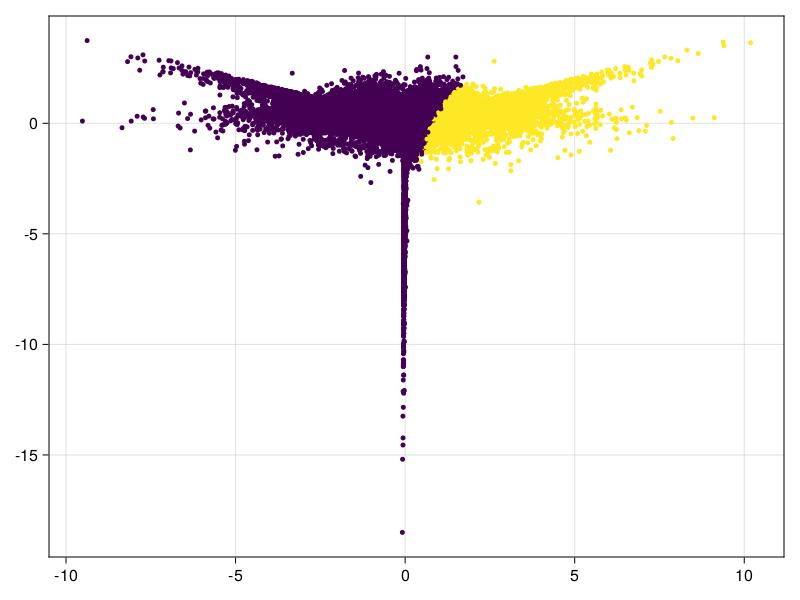

In [55]:
tree = CSV.read("data/bipartition_4taxa_tree.csv", DataFrame);
plot_kmeans(tree, 2)

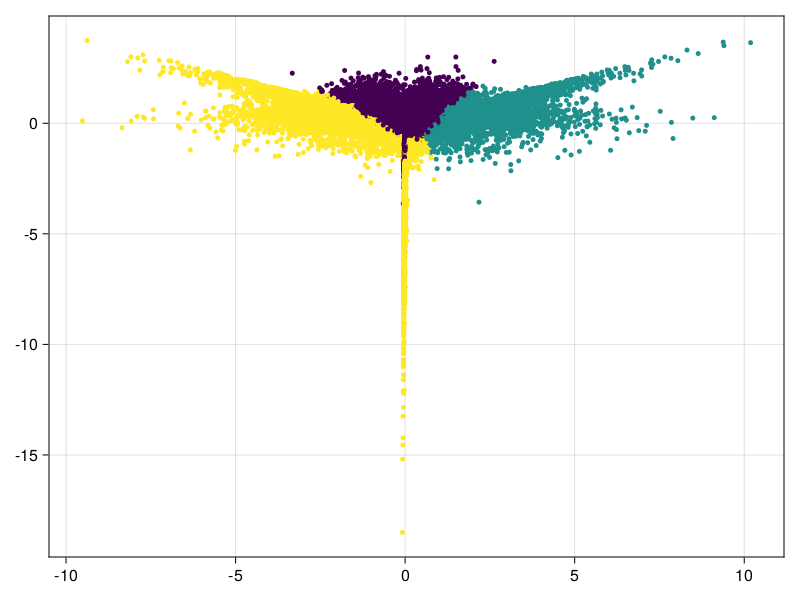

In [56]:
plot_kmeans(tree, 3)

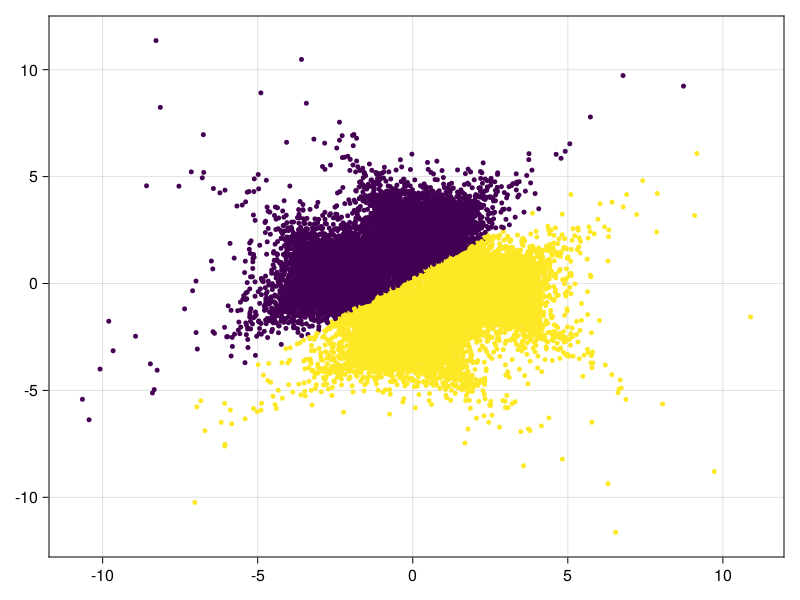

In [53]:
tree = CSV.read("data/bipartition_8taxa_tree.csv", DataFrame);
plot_kmeans(tree, 2)

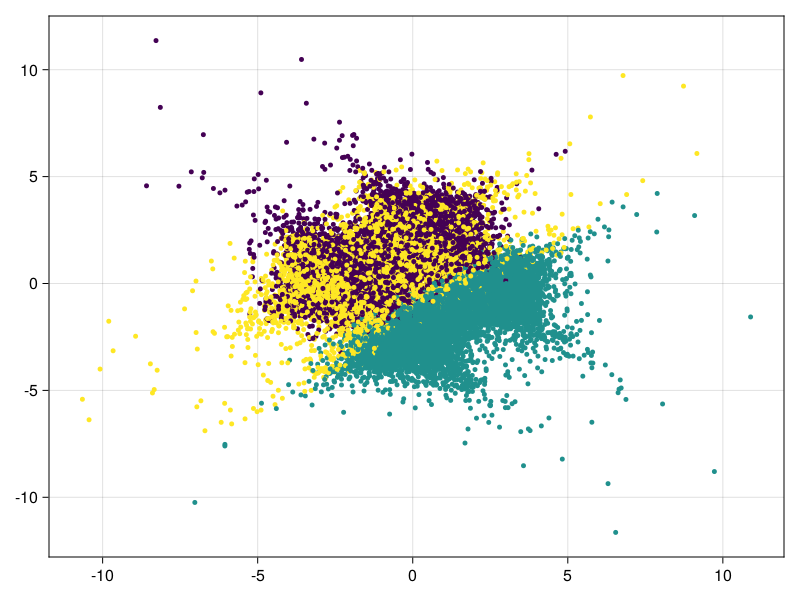

In [54]:
plot_kmeans(tree, 3)

In [57]:
one = CSV.read("data/one.csv", DataFrame);
two = CSV.read("data/two.csv", DataFrame);
three = CSV.read("data/three.csv", DataFrame);
four = CSV.read("data/four.csv", DataFrame);

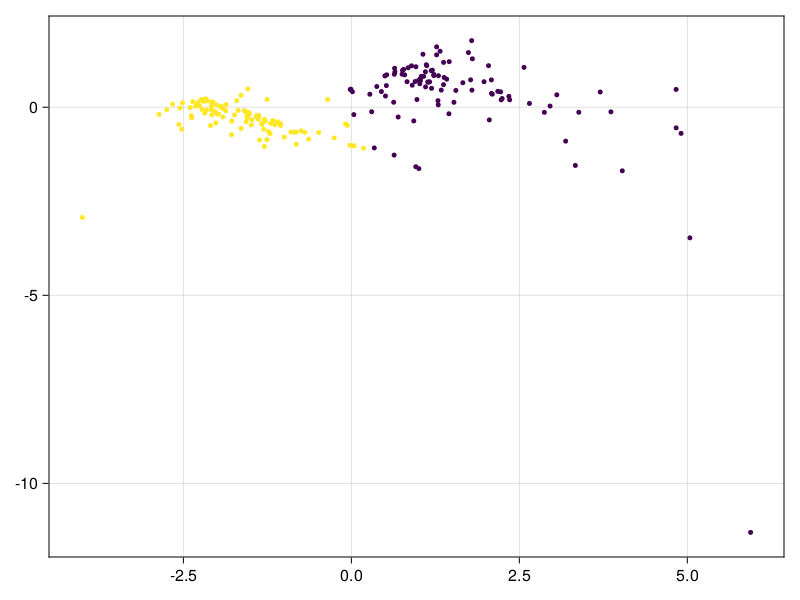

In [59]:
combine = vcat(one ,two)
plot_kmeans(combine, 2)

In [76]:
a = fill(0,100)
b = fill(1,100)
label = cat(a,b, dims = 1)
data  = collect(Matrix(combine[:,:])')
 # standardize tree
dt = fit(ZScoreTransform, data, dims=2)
data = StatsBase.transform(dt, data)
    
    # replace NaN value with 0
replace!(data, NaN=>0)

PCA_model = fit(PCA, data, maxoutdim = 2);
PCA_data = predict(PCA_model,data)

2×200 Matrix{Float64}:
 2.95728    0.761172  1.07647   4.90694   …  -0.255355  -2.02952   -1.30405
 0.0306784  0.980859  0.81994  -0.695846     -0.81762   -0.116908  -0.584265

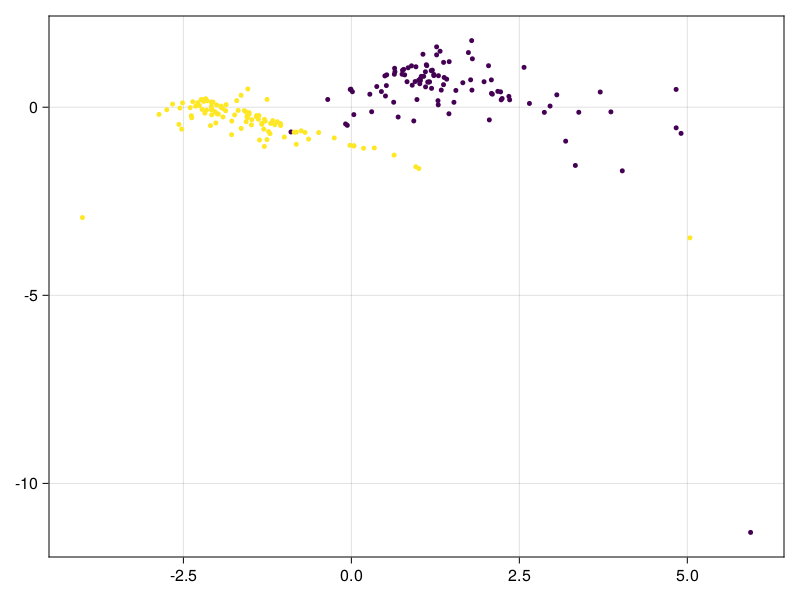

In [77]:
scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = label)